In [2]:
using Plots
theme(:gruvbox_light)

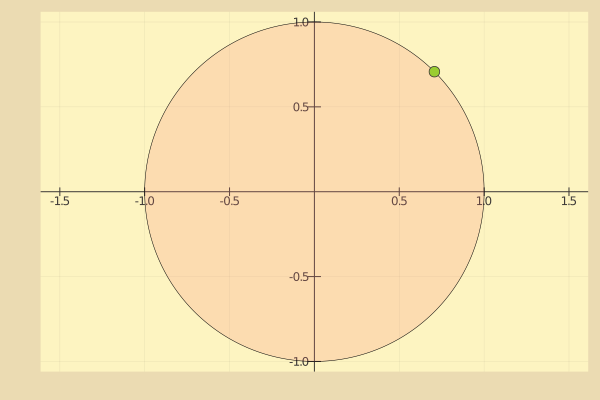

In [3]:
# See: https://discourse.julialang.org/t/plot-a-circle-with-a-given-radius-with-plots-jl/23295/5
# Colornames are defined here: https://github.com/JuliaGraphics/Colors.jl/blob/master/src/names_data.jl

# General function to create circle with center at h, k and radius r
function circle_shape(h, k, r)
    θ = LinRange(0, 2*π, 500)
    r*sin.(θ), r*cos.(θ)
end

# We can simplify this for drawing a unit circle
function unit_circle()
    θ = LinRange(0, 2pi, 500)
    sin.(θ), cos.(θ)
end

plot(
    unit_circle(),
    seriestype = [:shape],
    linecolor = :black,
    c = :salmon,
    lw = 0.5,
    aspect_ratio = 1,
    legend = false,
    fillalpha = 0.2,
    framestyle = :origin
)

# Let's put a point on it
p = sin(π/4), cos(π/4)
scatter!(p, c = :yellowgreen, m = 6)

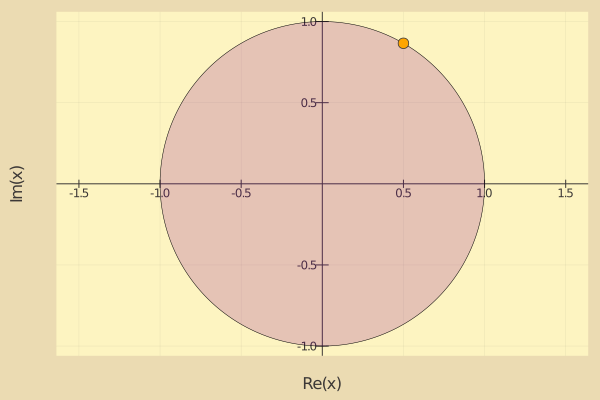

In [6]:
# Complex unit circle
function complex_unit_circle()
    θ = LinRange(0, 2pi, 500)
    exp.(1im * θ)
end

function plot_complex_unit_circle()
    plot(
        complex_unit_circle(),
        seriestype = [:shape],
        linecolor = :black,
        c = :darkmagenta,
        lw = 0.5,
        aspect_ratio = 1,
        legend = false,
        fillalpha = 0.2,
        framestyle=:origin,
    )
end

p = plot_complex_unit_circle()
v = exp(1im * π / 3)

# m stands for markersize 
scatter!((v.re, v.im), color=:orange, m = 6)


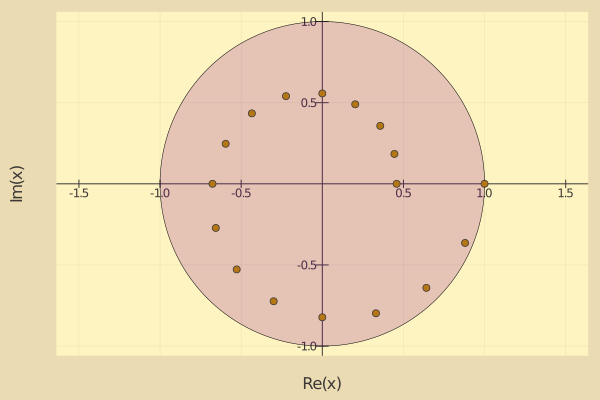

In [34]:
# Plotting Z values

plot_complex_unit_circle()

t = 0:2pi/16:2pi;

A = 1.05

w = 2pi / 16;

z(n) = A^(-n) * exp(-im * w * n)

vals  = [z(x) for x=0:16]

scatter!([(val.re, val.im) for val=vals])

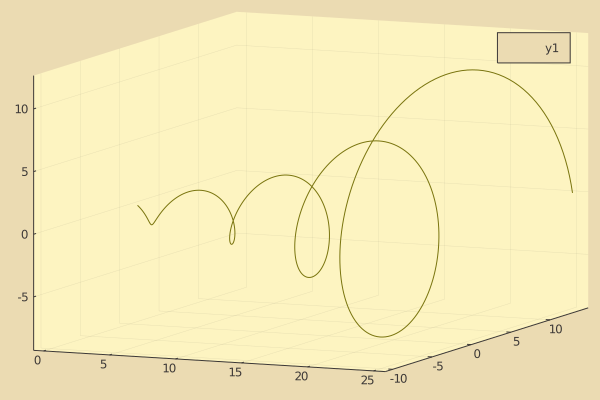

In [75]:
# We can view this signal in three dimensions as a spiral that either grows or shrinks with time

t = 0:2pi/128:8pi;

sigs(t) = A^(-t) * exp(-im * t)

signal = sigs.(t);

plot(t, [x.re for x=signal], [x.im for x=signal])

# Since we can correlate this signal with an input signal, we can use the z-plane to not only correlate 
# two sinusiods, but also an input sinusoid with a sinusiod that decays or grows exponentially!

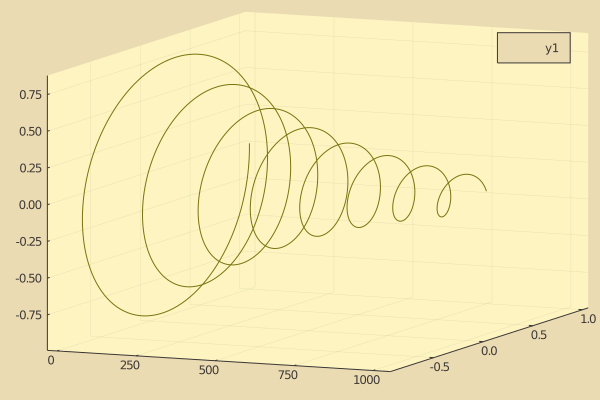

In [108]:
n = 0:1024;

A = 1.002;
w = 16pi / 1024;
c = A * exp(im * w);

signal = c.^(-n);

plot(n, [z.re for z=signal], [z.im for z=signal])

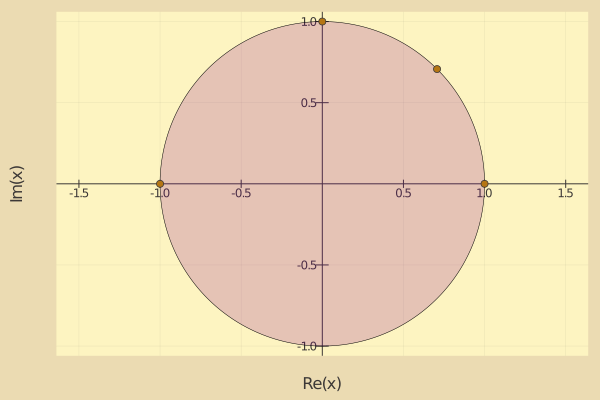

In [45]:
# The args A and w that establish the characteristics of the *complex variable* z can be reperesented
# on a 2-dimensional plane, where each point is sufficient to represent an entire complex signal

plot_complex_unit_circle()

analysis_frequencies = [0, pi/4., pi/2., pi];
A = 1.0
zs = [A * exp(im * w) for w=analysis_frequencies];

scatter!([(z.re, z.im) for z=zs])

# When A = 1, this is the DFT. When A < 1, we are describing a sinusoid (which can be used for correlation
# against an input sinusoid) that grows exponentially over time (showing instability).

# When A > 1 (outside the unit circle), we're describing a signal that is damped to some extent

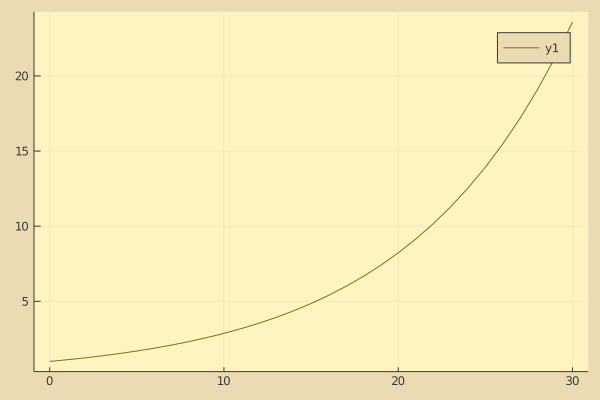

In [104]:
# Plotting the scalar
# Really all we're doing here is scaling a sinusoid by an envelope. Here's the envelope

n = 0:30;
A = 0.9;

plot(n, A.^(-n))